In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dfx=pd.read_csv('D:\Mafia\Week 3 - KNN Assignment\Week 3 - KNN Assignment\Training Data\Diabetes_XTrain.csv')
dfy=pd.read_csv('D:\Mafia\Week 3 - KNN Assignment\Week 3 - KNN Assignment\Training Data\Diabetes_YTrain.csv')
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [6]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


0    375
1    201
Name: Outcome, dtype: int64


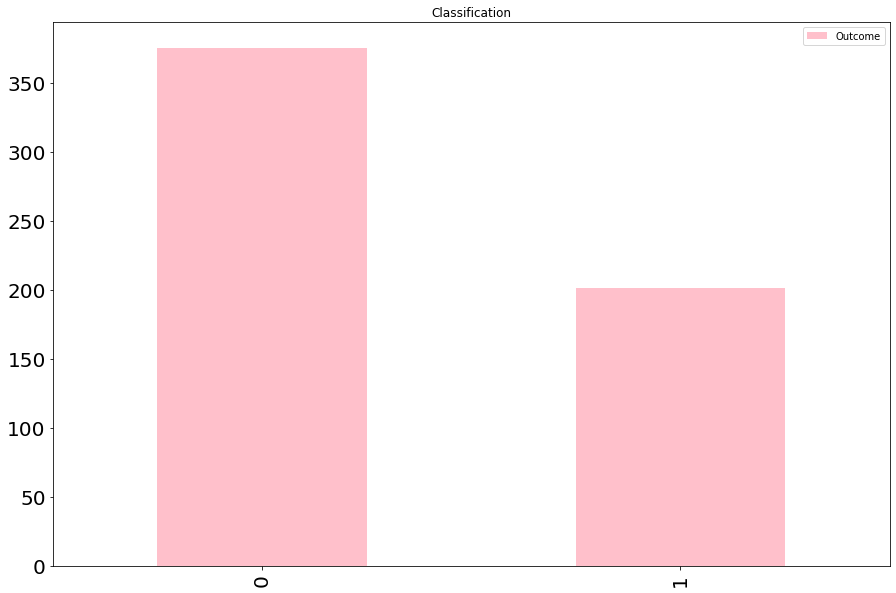

In [8]:
print(dfy['Outcome'].value_counts())
ax = dfy['Outcome'].value_counts().plot(kind='bar', title ="Classification", figsize=(15, 10), legend=True, fontsize=20,color='pink')
plt.show()

In [14]:
X=dfx.values
Y=dfy.values
Y=Y.reshape((-1,))
print(X.shape,Y.shape)

(576, 8) (576,)


In [10]:
print(X)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


In [11]:
print(Y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [15]:
def distance(x1,x2):
    return np.sqrt((sum(x1-x2)**2))

In [16]:
def KNN(X,Y,querypoint, k=91):   
    vals = []
    
    for i in range(X.shape[0]):
        d = distance(querypoint, X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [17]:
x_test=pd.read_csv('D:\Mafia\Week 3 - KNN Assignment\Week 3 - KNN Assignment\Testing Data\Diabetes_Xtest.csv')

x=x_test.values
print(x.shape)

(192, 8)


In [18]:
print(x)

[[0.00e+00 1.80e+02 9.00e+01 ... 3.65e+01 3.14e-01 3.50e+01]
 [2.00e+00 9.30e+01 6.40e+01 ... 3.80e+01 6.74e-01 2.30e+01]
 [2.00e+00 1.14e+02 6.80e+01 ... 2.87e+01 9.20e-02 2.50e+01]
 ...
 [0.00e+00 1.62e+02 7.60e+01 ... 4.96e+01 3.64e-01 2.60e+01]
 [1.20e+01 8.40e+01 7.20e+01 ... 2.97e+01 2.97e-01 4.60e+01]
 [0.00e+00 9.40e+01 0.00e+00 ... 0.00e+00 2.56e-01 2.50e+01]]


In [19]:
pred_list=[]
for i in range(x.shape[0]):
    pred = KNN(X,Y,x[i])
    pred_list.append(pred)

In [20]:
pred=np.array((pred_list),dtype=int)
print(pred)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0]


In [21]:
np.unique(pred,return_counts=True)

(array([0, 1]), array([156,  36], dtype=int64))

In [25]:
np.unique(pred,return_counts=True)

(array([0, 1]), array([156,  36], dtype=int64))